In [1]:
from sklearn import datasets
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [3]:
X_train.shape

(614, 8)

In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [5]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)


In [6]:
X_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222
...,...,...,...,...,...,...,...,...
609,-0.551400,1.129853,0.260536,0.957869,3.098656,0.992566,-1.008254,-0.279481
610,0.925736,2.078175,-0.956345,0.831660,2.686605,0.271185,1.107339,0.059484
611,2.698300,0.149919,1.071790,-1.250779,-0.678474,1.517206,0.364436,0.737415
612,0.039454,1.572403,0.159129,-1.250779,-0.678474,1.543438,0.046486,-0.618446


### Lasso

In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled,Y_train)

Lasso(alpha=0.01)

In [8]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

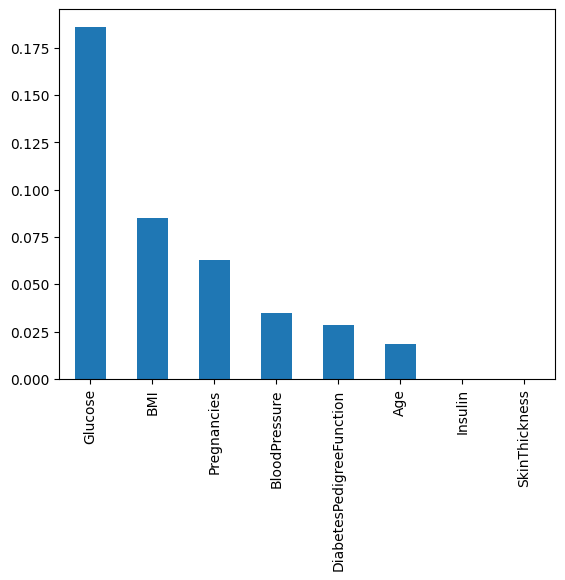

In [10]:
import numpy as np
x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### Feature Selection using Decision Tree

In [12]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [16]:
from sklearn.tree import  DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [17]:
dt.feature_importances_

array([0.06706633, 0.322177  , 0.13498322, 0.0606572 , 0.05632367,
       0.1724422 , 0.08875707, 0.09759332])

In [18]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x

Pregnancies                 0.067066
Glucose                     0.322177
BloodPressure               0.134983
SkinThickness               0.060657
Insulin                     0.056324
BMI                         0.172442
DiabetesPedigreeFunction    0.088757
Age                         0.097593
dtype: float64

<Axes: >

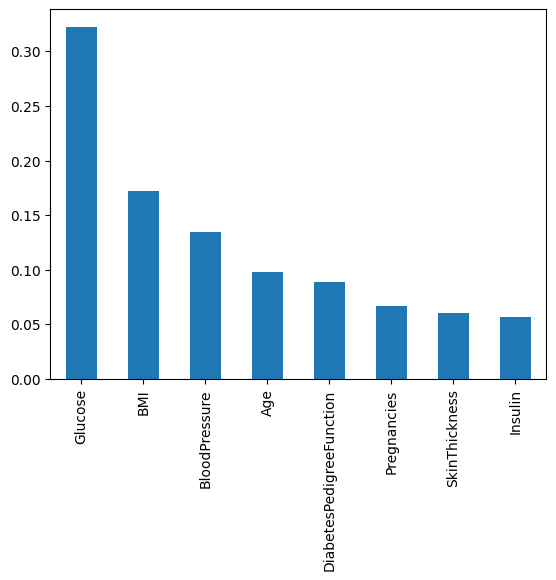

In [19]:
x.sort_values(ascending=False).plot(kind='bar')

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
rfc.feature_importances_

array([0.07776666, 0.2456505 , 0.08984119, 0.07297286, 0.07735787,
       0.1666306 , 0.12865674, 0.14112357])

<Axes: >

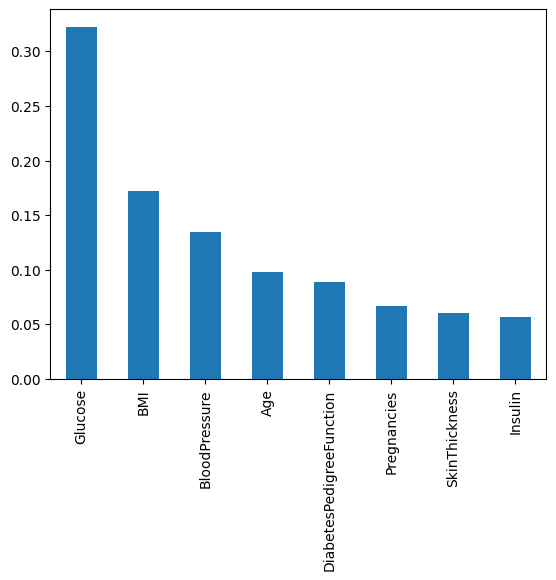

In [22]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)
x.sort_values(ascending=False).plot(kind='bar')


### SelectFromModel
    Transformer where embedding can be performed.

In [30]:
df = pd.read_csv('diabetes.csv')

X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [32]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model,threshold=0.1)

In [33]:
sfm.fit(X_train,Y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [34]:
sfm.get_support(indices=True)

array([1, 2, 5, 6, 7])

In [35]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,145.0,80.0,37.9,0.637,40.0
1,129.0,62.0,41.2,0.441,38.0
2,102.0,74.0,37.2,0.204,45.0
3,120.0,78.0,25.0,0.409,64.0
4,120.0,76.0,39.7,0.215,29.0
...,...,...,...,...,...
609,157.0,74.0,39.4,0.134,30.0
610,187.0,50.0,33.9,0.826,34.0
611,126.0,90.0,43.4,0.583,42.0
612,171.0,72.0,43.6,0.479,26.0


In [40]:
sfm = SelectFromModel(model,threshold=0.25)

In [41]:
sfm.fit(X_train,Y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.25)

In [42]:
sfm.get_support(indices=True)

array([1])

In [43]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose
0,145.0
1,129.0
2,102.0
3,120.0
4,120.0
...,...
609,157.0
610,187.0
611,126.0
612,171.0
